#About Dataset

salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

**- Features:**
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks



1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/shai_assignment/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [196]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# - Task.1

In [197]:
#Identify the number of rows and columns in the dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 148654
Number of columns: 13


In [198]:
#determine the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**- Based on above..**

| Feature | Data type in python | Data type in data science |Explaination |
|---------|-----------|--------------|--------------|
| Id        |     int64       |   Categorical (Ordinal)          |  feature is typically considered nominal when it serves as a unique identifier for distinct entities in a dataset.|
|   EmployeeName      |     object(like string)    |       Categorical (Nominal)        |   just strings it is not  numbers.            |
|   JobTitle       |    object(like string)       |      Categorical (Nominal)         |      just strings it is not  numbers.        |
|    BasePay     |     float64      |   Numerical(ratio)           |   BasePay has a defined zero point.          |
|    OvertimePay     |     float64      |      Numerical(ratio)        |     OvertimePay has a defined zero poin.t         |
|   OtherPay      |     float64       |       Numerical(ratio)        |      OtherPay has a defined zero point.         |
|  Benefits       |   float64         |     Numerical(ratio)         |     OtherPay has a defined zero point.         |
|   TotalPay      |   float64        |    Numerical(ratio)           |    TotalPay has a defined zero point.          |
|  TotalPayBenefits       |   float64        |  Numerical(ratio)            |   TotalPayBenefits   has a defined zero point.          |
|   Year      |     int64      |     Numerical(interval)         |    year has not   defined zero point.         |
|   Notes      |    float64       |     Categorical (Nominal)         |    python assigned it a float type because  contains NaN values but in reality it is just a string notes.           |
|  Agency       |    object       |    Categorical (Nominal)          |    just strings it is not  numbers.          |
|   Status      |    float64       |    Can not be determine           |  python assigned it a float type because  contains NaN values but I can not be  determine ( not clear to me like notes feature).         |


In [199]:
#check for missing values in each column..
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [200]:
# null values in EmployeeName  is 'not provide'
print("Number of null values in EmployeeName:",df[df.EmployeeName=='Not provided'].shape[0])
print("Number of null values in JobTitle:",df[df.JobTitle=='Not provided'].shape[0])

Number of null values in EmployeeName: 4
Number of null values in JobTitle: 4


# - Task.2

In [201]:
#Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.
values=df['TotalPay'].describe().values
#add the range
values=np.append(values,df['TotalPay'].describe()['max']-df['TotalPay'].describe()['min'])
indeces=df['TotalPay'].describe().index
indeces=np.append(indeces,'range')
#create Series
pd.Series(values,index=indeces)

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
range    568213.560000
dtype: float64

# - Task.3

In [202]:
#Handle missing data by suitable method with explain why you use it.
columns_null=df.isna().sum()
columns_null=columns_null[columns_null>0]
columns_null

BasePay           609
OvertimePay         4
OtherPay            4
Benefits        36163
Notes          148654
Status         148654
dtype: int64

In [203]:
#calculate the percentage of null values for each column
columns_null/df.shape[0] # notes and Status 100%! so I will drop it.

BasePay        0.004097
OvertimePay    0.000027
OtherPay       0.000027
Benefits       0.243270
Notes          1.000000
Status         1.000000
dtype: float64

In [204]:
df.drop(['Notes','Status'],axis=1,inplace=True)
columns_null=columns_null[columns_null!=148654]
columns_null

BasePay          609
OvertimePay        4
OtherPay           4
Benefits       36163
dtype: int64

In [205]:
#OvertimePay
df[df.OvertimePay.isnull()]#These rows do not provide us with any information , so they are not usefull to us

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [206]:
df[df.OtherPay.isnull()]#These rows do not provide us with any information , so they are not usefull to us

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


In [207]:
#OvertimePay and OtherPay
df=df[(df.OvertimePay.notnull())&(df.OvertimePay.notnull())]

In [208]:
#BasePay=TotalPay-(OvertimePay+OtherPay)
df['BasePay']=df['TotalPay']-(df['OvertimePay']+df['OtherPay'])

In [209]:
#Benefits=TotalPayBenefits-TotalPay --> from this equation can be fill miss values in Benefits column
df['Benefits']=df['TotalPayBenefits']-df['TotalPay']

In [210]:
df.isna().sum()#perfect

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

# - Task.4

<Axes: >

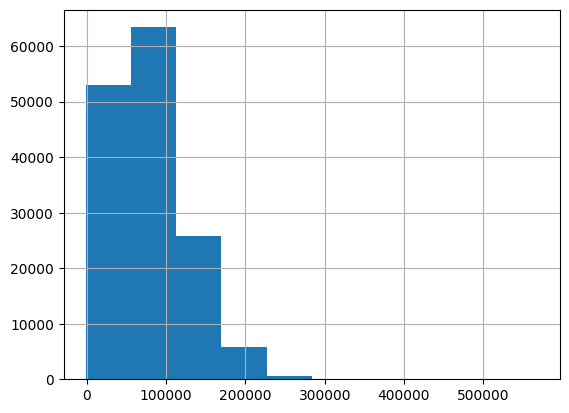

In [211]:
#Create histograms or bar charts to visualize the distribution of salaries
df.TotalPay.hist()
#This is expected because of the difference in jobs , of course the distribution will be skewed

In [212]:
#use pie charts to represent the proportion of employees in different departments
df['JobTitle']=df['JobTitle'].apply(lambda job: job.lower())#convert all to lower case
(df['JobTitle'].str.extract('(\(?[A-z]{3,} (department|dept)\)?)')[0]).value_counts()#extract DEPARTMENT name from JobTitle.
#I must be solve this problem (fire department and (fire department) are the same!)

(police department)    712
fire department        173
fire dept               83
(fire department)       53
(fire dept)             25
svcs dept               19
hygienist dept          10
services department      6
trnsp dept               3
Name: 0, dtype: int64

In [213]:
import re
def extract_jobName(text):
  result=''
  if (re.search(r'(\s?[A-z]?-?[A-z]+\s?)+',text)):#check if any matching
   result=re.search(r'(\s?[A-z]?-?[A-z]+\s?)+',text).group()
  return result

#extract job_name for my analysis..

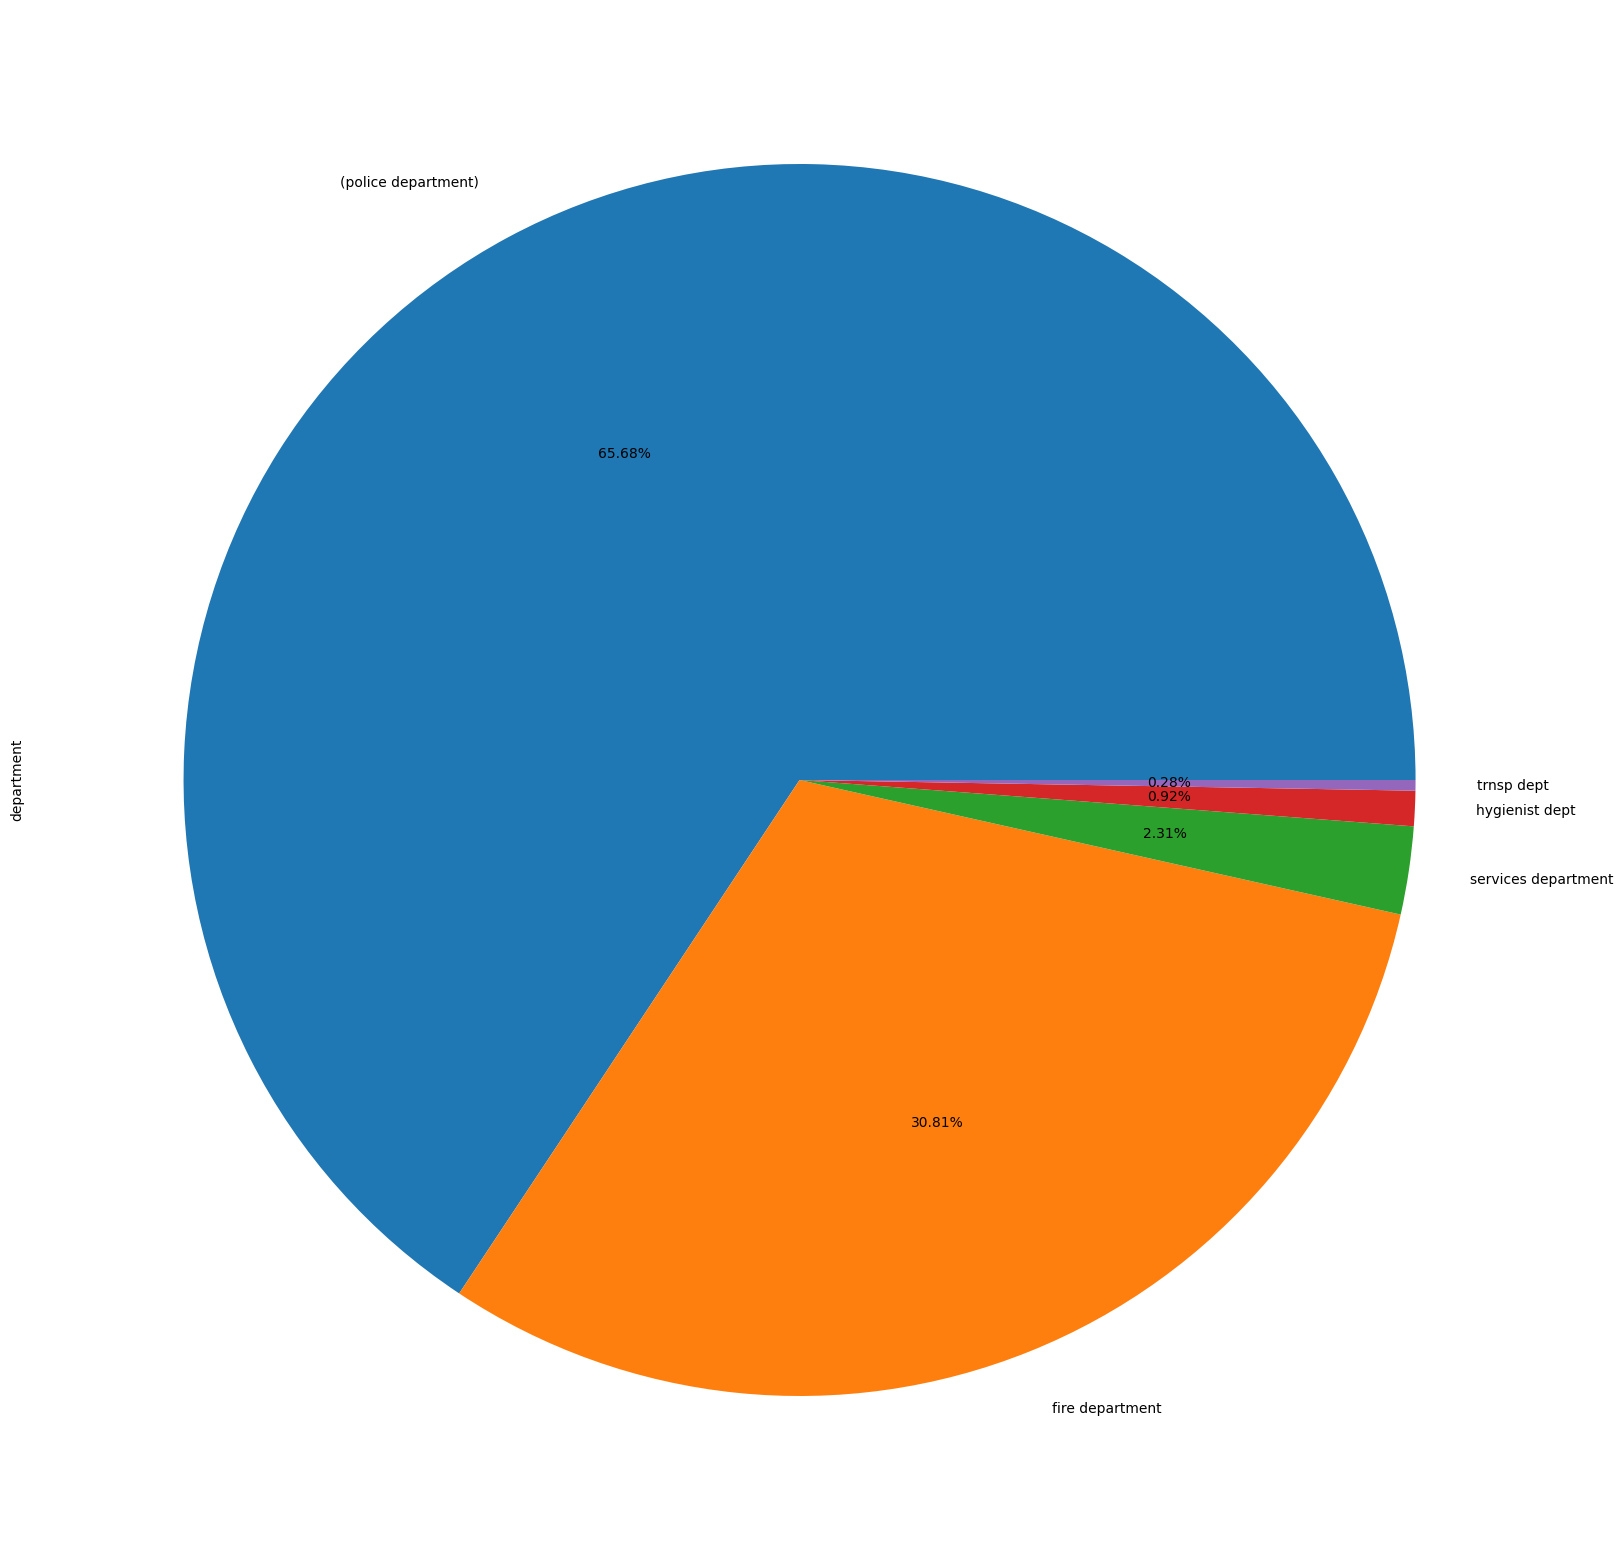

In [214]:
plt.figure(figsize=(20,20))
df['Job']=df['JobTitle'].apply(extract_jobName)#extract job from jobtitle
df['department']=df['JobTitle'].str.extract('(\(?[A-z]{3,} (department|dept)\)?)')[0]#extract department from jobtitle
df.loc[df['department'].isin(['fire department','(fire department)','fire dept','(fire dept)']),'department']='fire department'
df.loc[df['department']=='svcs dept','department']='services department'
df['department'].value_counts().plot.pie(autopct='%.2f%%')
df.loc[df['department'].isnull(),'department']='Not dept'
df.drop('JobTitle',axis=1,inplace=True)#drop not useful column

# - Task**.5**

In [215]:
#I will divide the data based on the (department) to see the diff between job salaries
pivot_table = pd.pivot_table(df, values='TotalPay', index=['department'], aggfunc=['median','mean','std', 'min', 'max',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)])
pivot_table.columns=['median','mean','std', 'min', 'max','Q1','Q3']
pivot_table

,median,mean,std,min,max,Q1,Q3
department,,,,,,,
(police department),152548.170,158423.671517,31639.961164,283.86,538909.28,142698.2400,168557.5275
Not dept,71056.095,74117.924621,49985.318621,-618.13,567595.43,35704.7150,104845.0100
fire department,168722.320,182237.222754,50558.675164,0.00,336922.01,150909.9325,201628.3300
hygienist dept,116824.000,109496.035000,22128.531408,46565.40,116824.08,116640.1975,116824.0175
services department,67651.070,66852.588400,16366.768367,7310.90,86424.04,63701.0600,78912.0200
trnsp dept,294000.180,297769.413333,6528.512299,294000.17,305307.89,294000.1750,299654.0350


In [216]:
#I will divide the data based on the (department,year) to see the diff between job salaries per year
pivot_table = pd.pivot_table(df, values='TotalPay', index=['department','Year'], aggfunc=['median', 'min', 'max',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75)])
pivot_table.columns=['median', 'min', 'max','Q1','Q3']
pivot_table

median        min        max           Q1  \
department          Year                                                  
(police department) 2011  152379.470     283.86  538909.28  142386.0500   
                    2012  145918.115     438.22  213297.43  143085.4450   
                    2013  166475.865    7857.26  192433.32  153874.1325   
                    2014  153270.620  120050.22  190270.76  148058.7750   
Not dept            2011   67301.240       0.00  567595.43   35320.3200   
                    2012   70674.260       0.00  362844.66   37467.1075   
                    2013   74441.030       0.00  347102.32   36729.6900   
                    2014   72355.000    -618.13  471952.64   33334.0000   
fire department     2011  168722.320    7093.37  326373.19  148055.2225   
                    2012  166931.170   61381.76  315728.77  150459.7000   
                    2013  169892.460       0.00  336922.01  157809.6750   
                    2014  166467.140  126082.21  329390.54  156309.1650   
hygienist dept      2011  116824.000   46565.40  116824.08  116640.1975   
services department 2011   59924.025   59923.81   78912.04   59923.9825   
                    2012   64010.530   63701.06   80782.01   63711.0675   
                    2013   68067.150    7310.90   86424.04   53571.3000   
                    2014   67963.045   67553.33   86167.03   67651.0400   
trnsp dept          2012  294000.170  294000.17  294000.17  294000.1700   
                    2013  305307.890  305307.89  305307.89  305307.8900   
                    2014  294000.180  294000.18  294000.18  294000.1800   

                                   Q3  
department          Year               
(police department) 2011  168241.2150  
                    2012  160261.7275  
                    2013  174658.8825  
                    2014  177746.0950  
Not dept            2011   98919.6675  
                    2012  103875.1075  
                    2013  109559.5400  
                    2014  107787.2000  
fire department     2011  196081.5950  
                    2012  220500.0600  
                    2013  233686.2150  
                    2014  210908.0725  
hygienist dept      2011  116824.0175  
services department 2011   74165.0225  
                    2012   76656.5000  
                    2013   72511.2050  
                    2014   81226.0350  
trnsp dept          2012  294000.1700  
                    2013  305307.8900  
                    2014  294000.1800

In [217]:
#I will divide the data based on the (job) to see the diff between job salaries per year
pivot_table = pd.pivot_table(df, values='TotalPay', index=['Job'], aggfunc=['median', 'min', 'max',lambda x: x.quantile(0.25),lambda x: x.quantile(0.75),'mean','count'])
pivot_table.columns=['median', 'min', 'max','Q1','Q3','mean','count']
pivot_table.sort_values(by='count',ascending=False)

,median,min,max,Q1,Q3,mean,count
Job,,,,,,,
transit operator,72036.84,0.00,157310.65,44796.120,84261.4275,63958.939444,9424
special nurse,19710.26,0.00,179203.29,6658.780,47561.5800,32717.231561,5791
registered nurse,121539.68,0.00,199600.46,101357.725,135831.5250,113466.920872,4955
police officer,137285.61,0.00,267902.74,127112.485,152032.0075,135437.536182,3562
custodian,52483.40,0.00,83846.77,37495.000,56928.8500,45448.577343,3214
...,...,...,...,...,...,...,...
lieutenant ii,152985.39,152985.39,152985.39,152985.390,152985.3900,152985.390000,1
track maintenance superintendent,92314.64,92314.64,92314.64,92314.640,92314.6400,92314.640000,1
lieutenant i,153795.73,153795.73,153795.73,153795.730,153795.7300,153795.730000,1


In [218]:
#special nurse high varaince in salary but, why? This can be explained because it's 'special'  there is no fixed BasePay
df[df.Job=='special nurse']

,Id,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Job,department
1401,1402,CHRISTIAN KITCHIN,124568.32,16171.43,22452.04,0.00,163191.79,163191.79,2011,San Francisco,special nurse,Not dept
1901,1902,CARLEY ANGELL,125199.63,4375.73,25069.57,0.00,154644.93,154644.93,2011,San Francisco,special nurse,Not dept
2096,2097,SHOU MEI LIN,123140.60,10488.29,18588.53,0.00,152217.42,152217.42,2011,San Francisco,special nurse,Not dept
2251,2252,JOSEPH MALLOY,121150.62,9298.30,19031.32,0.00,149480.24,149480.24,2011,San Francisco,special nurse,Not dept
2477,2478,FRANCIS VALLESTEROS,127253.61,1194.94,18474.97,0.00,146923.52,146923.52,2011,San Francisco,special nurse,Not dept
...,...,...,...,...,...,...,...,...,...,...,...,...
148535,148536,Edenora F Sunga,79.37,0.00,3.87,18.13,83.24,101.37,2014,San Francisco,special nurse,Not dept
148543,148544,Rosalyn J Stovall,79.99,0.00,0.00,16.44,79.99,96.43,2014,San Francisco,special nurse,Not dept
148577,148578,Honesto E Cacho,41.21,0.00,4.12,10.51,45.33,55.84,2014,San Francisco,special nurse,Not dept
148610,148611,Ruby S Martin,21.22,0.00,0.00,4.99,21.22,26.21,2014,San Francisco,special nurse,Not dept


In [219]:
#compare the average salaries across different department groups
pivot_table = pd.pivot_table(df, values='TotalPay', index=['department'], aggfunc='mean').sort_values(by='TotalPay',ascending=False)
pivot_table

,TotalPay
department,
trnsp dept,297769.413333
fire department,182237.222754
(police department),158423.671517
hygienist dept,109496.035000
Not dept,74117.924621
services department,66852.588400


In [220]:
#compare the average salaries across different job groups
pivot_table = pd.pivot_table(df, values='TotalPay', index=['Job'], aggfunc='mean').sort_values(by='TotalPay',ascending=False)
pivot_table

,TotalPay
Job,
general manager-metropolitan transit authority,399211.275000
chief investment officer,339653.700000
chief,325971.683333
chief of police,313885.882500
deputy director of investments,307899.460000
...,...
public safety communications technician,149.510000
commissioner,25.760000
drug court coordinator,0.000000


# - Task**.6**

<Axes: >

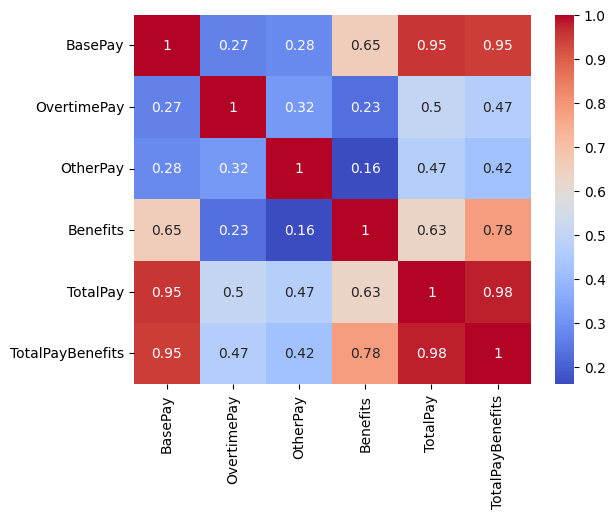

In [221]:
#Identify any correlation between salary and another numerical column
import seaborn as sns
sns.heatmap(df[['BasePay','OvertimePay', 'OtherPay', 'Benefits','TotalPay', 'TotalPayBenefits']].corr(),annot=True,
            cmap='coolwarm')

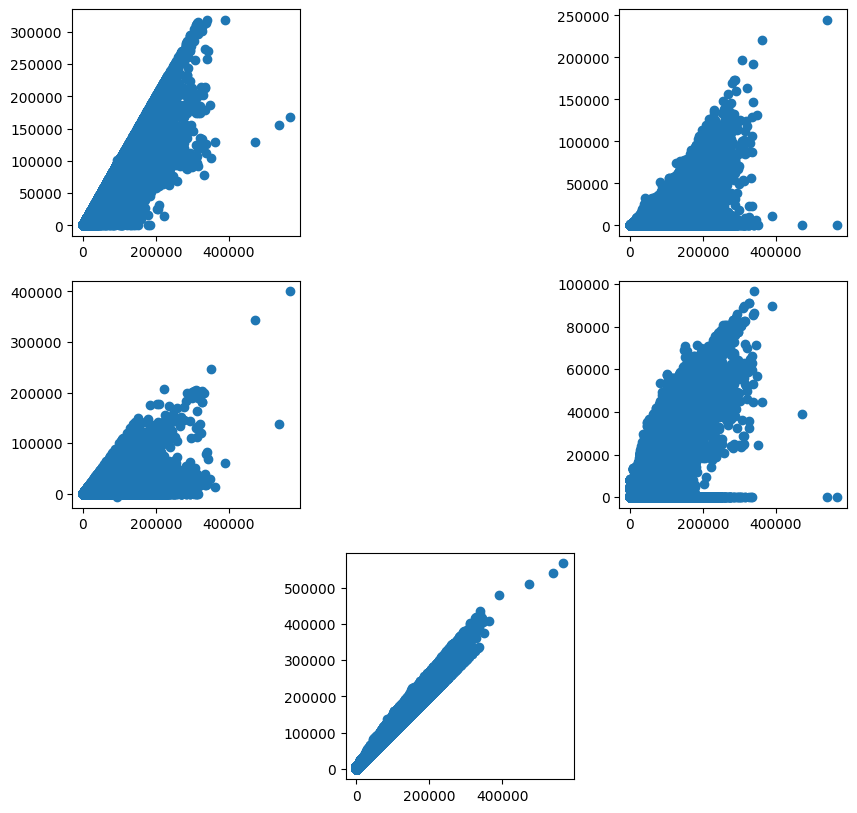

In [222]:
#plot a scatter plot to visualize the relationship
fig=plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(3,3,1)
ax1.scatter(df['TotalPay'],df['BasePay'])
ax2=fig.add_subplot(3,3,3)
ax2.scatter(df['TotalPay'],df['OvertimePay'])
ax3=fig.add_subplot(3,3,4)
ax3.scatter(df['TotalPay'],df['OtherPay'])
ax4=fig.add_subplot(3,3,6)
ax4.scatter(df['TotalPay'],df['Benefits'])
ax5=fig.add_subplot(3,3,8)
ax5.scatter(df['TotalPay'],df['TotalPayBenefits'])


# - Task.7

| Insight | Explainations and prove insight |
----------|---------------------------------|
|There are some jobs whose owners received a high salary .| Because that was the salary histogram is right skewed. |
| There is no significant disoersion between salaries (instead of some high salaries ) , But most of them are centered aroud the mean .  | I known this because the range is large , and this is evidence of some high salaries , but in general the value of the median and the mean is very close , rather than the value of std being considered good .|
| I noticed that there are some jobs where the salary is zero or negative , it is error?! | I don't know, but it is illogical for salary to be = zero or a negative value.|
|There are about 0.0037 of jobs that earn only from benefits.| I subtracted the totalpay from the benefits and counted the number of zeros.|
|In term of Department the highest salaries are found in fire dept .  | I calculated the mean for salaries in each department,I found high mean salaries in transp dept but the count for tansp dept very very low (0.28%), so I take the second high mean salaries.|
|It is the highest department in term of number of employees is police dept almost 66%.|showed a pie chart in above .|
|It is the lowest department in term of number of employees is trans dept almost 0.28%.|showed a pie chart in above .|
|There is a positive correlation between salary and other numerical features. |This is normal and expected because all features increase are in favor to the salary increase in general.|
|There is a very strong positive relationship between TotalPay and TotalPayBenefits ( 98%).| This is because the benefits values are small and their impact on the overall salary is small . and 27% of thw benefits values being equal to zeros , this all leads to the values without benefits or with benefits being very very similar.|
| When I calculated the changein the minimum salaries for each dept ,I found an increasing in the minimum over the years , especially the period from 2013 --> 2014 .|  You can view it in task 5.|
| For each dept the deviation in salaries is low.| Becuase std for each dept is  moderate .|
|Most reoetitive job is transit operator.|You can view it in task 5.|
|There is a big difference in salaries for some jobs, even thought they are the same job and rank!|Example of it --> job 'special nurse' ,This can be explained because it's 'special'  there is no fixed BasePay|


